## Independent t-test: Gender vs Spending Score

**H0 (Null Hypothesis):**
There is no difference in mean spending score between male and female customers. (kadın ve erkek müşterilerin harcama puanları arasında anlamlı fark yoktur.)

**H1 (Alternative Hypothesis):**
There is a significant difference in mean spending score between male and female customers. (kadın ve erkek müşterilerin harcama puanları arasında anlamlı fark vardır.)


In [23]:
import pandas as pd
from scipy import stats


In [24]:
df = pd.read_csv("../data/customers_test.csv")
df.head()


,customer_id,gender,spending_score
0,1,Male,39
1,2,Female,81
2,3,Male,6
3,4,Female,77
4,5,Male,40


In [25]:
male_scores = df[df["gender"] == "Male"]["spending_score"] # erkek bireyler
female_scores = df[df["gender"] == "Female"]["spending_score"] # kadın bireyler


In [26]:
stats.shapiro(male_scores)

ShapiroResult(statistic=np.float64(0.8091052166640472), pvalue=np.float64(0.09593426666168518))

In [27]:
stats.shapiro(female_scores)


ShapiroResult(statistic=np.float64(0.9594813144841929), pvalue=np.float64(0.8043667517855431))

**Normallik varsayımı**: Shapiro-Wilk normallik testi sonucunda her iki harcama puanlarının p değerleri 0.050 den büyük olduğundan normallik varsayımı sağlanmıştır.
(male_scores p value = 0.095, famele_scores p value =0,804)


In [28]:
t_stat, p_value = stats.ttest_ind(male_scores, female_scores, equal_var=False)
t_stat, p_value


(np.float64(-6.269621215284873), np.float64(0.0005939590175327443))

**Test Result Interpretation:** Since the p-value is less than 0.05, we reject the null hypothesis.
This indicates a statistically significant difference in mean spending scores
between male and female customers. (p value = 0.0005 < 0.050 olduğundan H0 hipotezi reddedilir.
Kadın ve erkek bireylerin harcama puanları arasında
istatistiksel olarak anlamlı bir fark vardır.) 

## One-Way ANOVA: Spending Score by Category

**H0 (Null Hypothesis):**  
Mean spending scores are equal across all product categories. (Harcama puanları ortalamaları tüm kategorilerde eşittir.)

**H1 (Alternative Hypothesis):**  
At least one category has a different mean spending score. (En az bir kategorinin harcama puanları ortalaması farklıdır.)


In [29]:
import pandas as pd
from scipy import stats

In [30]:
df = pd.read_csv("../data/category_spending.csv")
df.head()

,customer_id,category,spending_score
0,1,Electronics,45
1,2,Electronics,52
2,3,Electronics,48
3,4,Electronics,60
4,5,Electronics,55


In [31]:
df.groupby("category")["spending_score"].mean()

category
Clothing       74.6
Electronics    53.0
Grocery        33.4
Name: spending_score, dtype: float64

Clothing category shows the highest average spending score, while Grocery has the lowest. (Giyim kategorisi en yüksek harcama puanına sahip iken 
market ürünleri en düşük puana sahiptir.)

In [32]:
for cat in df["category"].unique():
    stat, p = stats.shapiro(df[df["category"] == cat]["spending_score"])
    print(cat, p)

Electronics 0.8207966376455027
Clothing 0.8793598982651701
Grocery 0.8793598982651682


**normallik varsayımı:** Tüm kategorilerde p değeri > 0.05 olduğundan normallik varsayımı sağlanmıştır.

In [33]:
electronics = df[df["category"] == "Electronics"]["spending_score"]
clothing = df[df["category"] == "Clothing"]["spending_score"]
grocery =  df[df["category"] == "Grocery"]["spending_score"]

stats.levene(electronics, clothing, grocery)

LeveneResult(statistic=np.float64(1.0949720670391054), pvalue=np.float64(0.3489488366661319))

**Varyans Homojenliği:** Levene testi sonucunda p değeri = 0.348 > 0.05 olduğundan varyanslar homojendir.

In [34]:
f_stat, p_value = stats.f_oneway(electronics, clothing, grocery)
f_stat, p_value

(np.float64(199.4906054279739), np.float64(6.708722471134235e-17))

**ANOVA Result Interpretation:** Since the p-value is less than 0.05, we reject the null hypothesis.
This indicates that at least one product category has a significantly
different mean spending score.(P değeri 0.05'den küçük olduğundan H0 hipotezi
reddedilir. En az bir kategorinin harcama puanı ortalaması diğerlerinden farklıdır.)


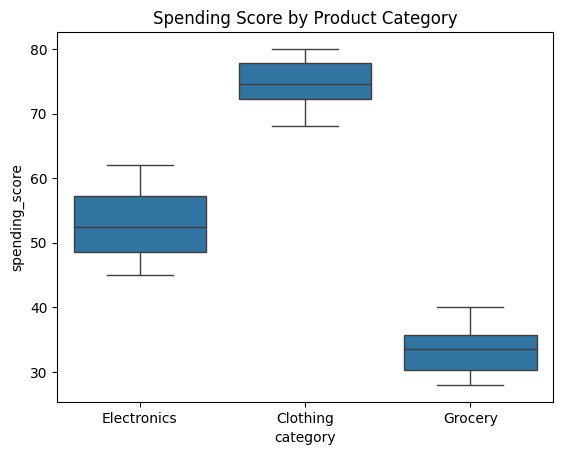

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="category", y="spending_score", data=df)
plt.title("Spending Score by Product Category")
plt.show()


## POST-HOC: Tukey HSD
Hangi gruplar farklıdır?

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [22]:
tukey = pairwise_tukeyhsd(
    endog=df["spending_score"],   # bağımlı değişken
    groups=df["category"],        # gruplar
    alpha=0.05
)

print(tukey)


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj  lower    upper   reject
---------------------------------------------------------------
   Clothing Electronics    -21.6   0.0 -26.7161 -16.4839   True
   Clothing     Grocery    -41.2   0.0 -46.3161 -36.0839   True
Electronics     Grocery    -19.6   0.0 -24.7161 -14.4839   True
---------------------------------------------------------------


**Post-hoc (Tukey HSD) Interpretation:** The Tukey HSD test indicates that all pairwise comparisons
between product categories are statistically significant.
Clothing has significantly higher spending scores than both
Electronics and Grocery categories. (Tukey HSD testi ile yapılan ikili karşılaştırmaların hepsi istatistiksel olarak anlamlıdır.
Giyim kategorisinin harcama puanları elektronik ve market kategorilerin harcama puanlarından fazladır.)


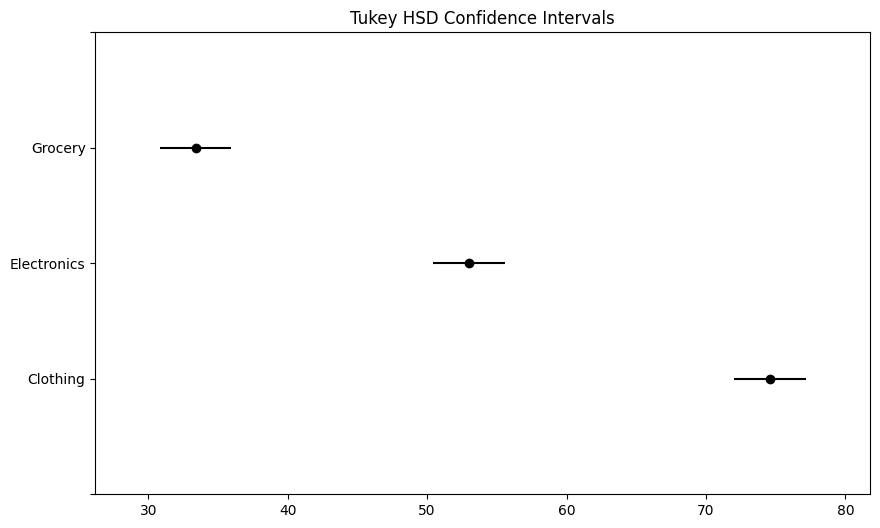

In [37]:
tukey.plot_simultaneous()
plt.title("Tukey HSD Confidence Intervals")
plt.show()